In [1]:
getwd()

setwd('/content')
dir()

[1] "/content"

[1] "Medicaldataset_Mod_2.csv" "sample_data"

In [2]:
Medical = read.csv('Medicaldataset_Mod_2.csv', header = T, stringsAsFactors = F)
#head
View(Medical)

Age,Gender,Heart.rate,Systolic.blood.pressure,Diastolic.blood.pressure,Blood.sugar,CK.MB,Troponin,Result
<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
64,Male,66,160,83,160,1.800,0.012,negative
21,Male,94,98,46,296,6.750,1.060,positive
55,Male,64,160,77,270,1.990,0.003,negative
64,Male,70,120,55,270,13.870,0.122,positive
55,Male,64,112,65,300,1.080,0.003,negative
58,Female,61,112,58,87,1.830,0.004,negative
32,Female,40,179,68,102,0.710,0.003,negative
63,Male,60,214,82,87,300.000,2.370,positive
44,Female,60,154,81,135,2.350,0.004,negative


In [3]:
library(ggplot2)

In [4]:
Medical$Blood.sugar_log <- log1p(Medical$Blood.sugar)


head(Medical)

,Age,Gender,Heart.rate,Systolic.blood.pressure,Diastolic.blood.pressure,Blood.sugar,CK.MB,Troponin,Result,Blood.sugar_log
,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,64,Male,66,160,83,160,1.80,0.012,negative,5.081404
2,21,Male,94,98,46,296,6.75,1.060,positive,5.693732
3,55,Male,64,160,77,270,1.99,0.003,negative,5.602119
4,64,Male,70,120,55,270,13.87,0.122,positive,5.602119
5,55,Male,64,112,65,300,1.08,0.003,negative,5.707110
6,58,Female,61,112,58,87,1.83,0.004,negative,4.477337


In [5]:
library(dplyr, warn.conflicts=FALSE)
grouped <- group_by(tbl_df(Medical),Result)
summarize(grouped, count = length(Result), mean = mean(Blood.sugar_log), median = median(Blood.sugar_log), stdev = sd(Blood.sugar_log))

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


Result,count,mean,median,stdev
<chr>,<int>,<dbl>,<dbl>,<dbl>
negative,509,4.914015,4.770685,0.4249508
positive,810,4.888383,4.762174,0.4072459


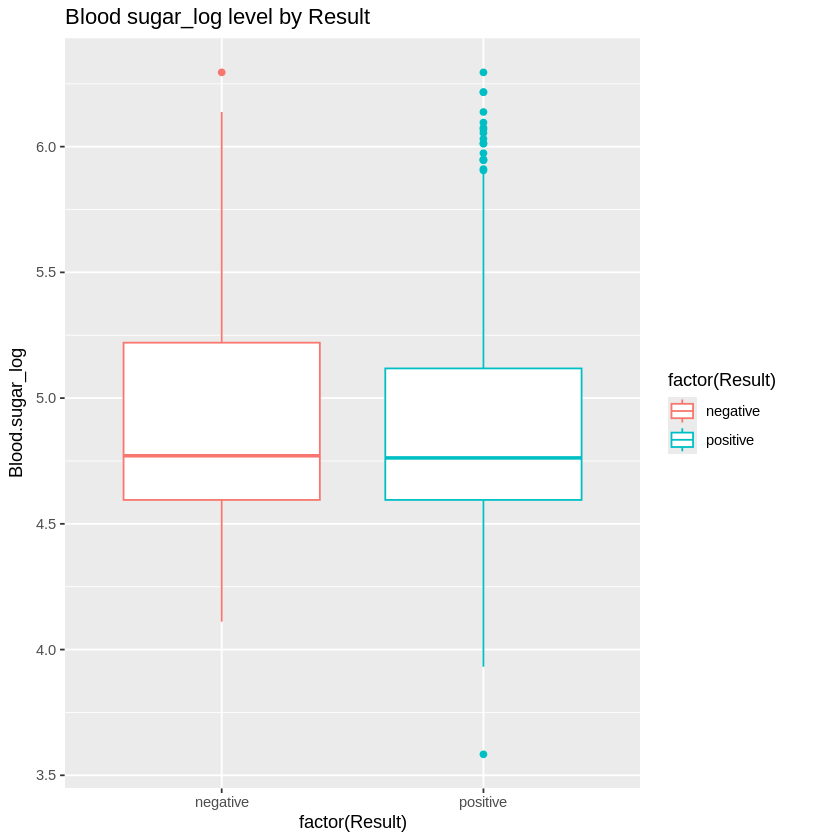

In [6]:
ggplot(grouped, aes(x=factor(Result),y=Blood.sugar_log,color=factor(Result))) + geom_boxplot()+
        labs(title="Blood sugar_log level by Result")


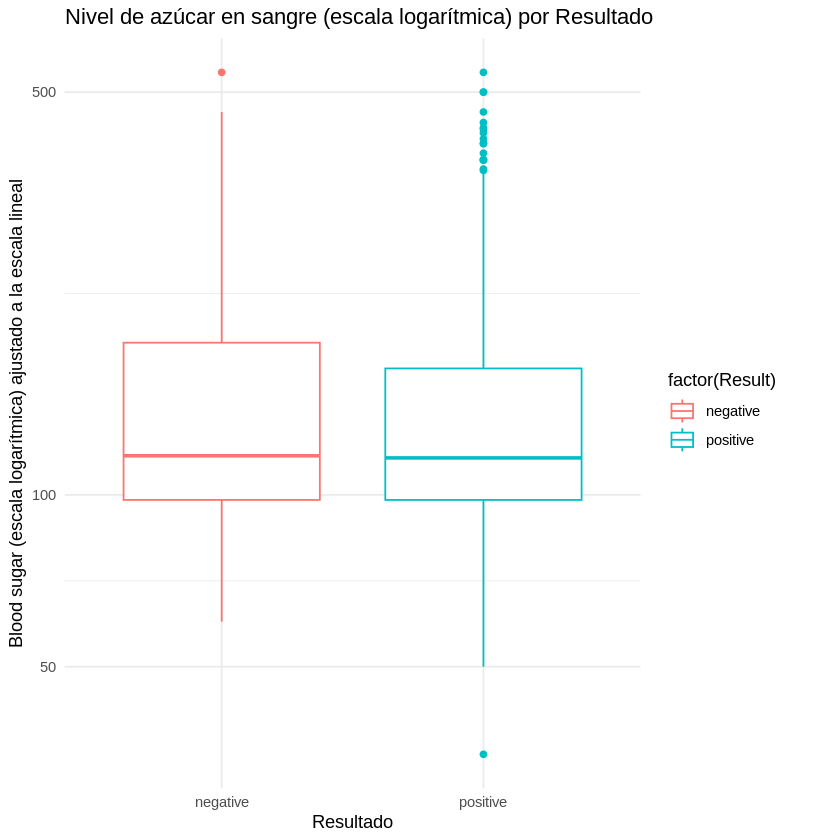

In [9]:
original_ticks_ckmb <- c(1, 5, 10, 50, 100, 500)

log_ticks_ckmb <- log1p(original_ticks_ckmb)

ggplot(Medical, aes(x=factor(Result), y=Blood.sugar_log, color=factor(Result))) +
  geom_boxplot() +
  labs(title="Nivel de azúcar en sangre (escala logarítmica) por Resultado",
       y = "Blood sugar (escala logarítmica) ajustado a la escala lineal",
       x = "Resultado") +
  scale_y_continuous(breaks = log_ticks_ckmb,
                     labels = original_ticks_ckmb) +
  theme_minimal()

In [8]:
Medical_ttest <- t.test(Blood.sugar_log ~ Result, data = Medical)
Medical_ttest


	Welch Two Sample t-test

data:  Blood.sugar_log by Result
t = 1.0836, df = 1045, p-value = 0.2788
alternative hypothesis: true difference in means between group negative and group positive is not equal to 0
95 percent confidence interval:
 -0.02078407  0.07204714
sample estimates:
mean in group negative mean in group positive 
              4.914015               4.888383 


In [ ]:
#detect outlyers_CK.MB
# 1. Get the outlier values
boxplot_stats <- boxplot.stats(Medical$Blood.sugar_log)
outlier_values <- boxplot_stats$out

# 2. Find the row numbers where these outlier values appear in the original column
#    We use `which()` to get the indices (row numbers) where the values match any of the outliers.
outlier_rows <- which(Medical$Blood.sugar_log %in% outlier_values)

# 3. Combine the row numbers and outlier values into a data frame for a clear list
outlier_info <- data.frame(
  Row_ID = outlier_rows,
  Outlier_Value = Medical$Blood.sugar_log[outlier_rows] # Get the actual outlier value for that row
)

# Print the list of outlier IDs and their values
print(outlier_info)

   Row_ID Outlier_Value
1      76      5.973810
2      92      5.961005
3     208      6.137727
4     211      6.047372
5     281      6.068426
6     334      6.013715
7     339      6.216606
8     346      6.295266
9     366      6.030685
10    389      6.095825
11    392      6.011267
12    442      6.003887
13    445      6.054439
14    735      5.971262
15    744      3.583519
16    782      6.075346
17    839      6.008813
18   1005      5.973810
19   1021      5.961005
20   1137      6.137727
21   1140      6.047372
22   1210      6.068426
23   1263      6.013715
24   1268      6.216606
25   1275      6.295266
26   1295      6.030685
27   1318      6.095825
